## Classification Project

### Importing All The Necesaary Libraries

In [1]:
# To avoid the unnecessary warning
from warnings import filterwarnings
filterwarnings('ignore')

# To read the data
import pandas as pd
import numpy as np

# Data preprocessing & data cleaning
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Train Test Split
from sklearn.model_selection import train_test_split

# models Required 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import f1_score,classification_report,ConfusionMatrixDisplay,RocCurveDisplay

# Reading the data & Performing basic quality checks

In [2]:
url = r'https://raw.githubusercontent.com/Sid-2862/datasets/refs/heads/main/train%20classifcation.csv'
df = pd.read_csv(url)
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Separate x and y features

In [6]:
x = df.drop(columns=["id","Product ID","Machine failure","TWF","HDF","PWF","OSF","RNF"])
y = df[["Machine failure"]]

In [7]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L,300.6,309.6,1596,36.1,140
1,M,302.6,312.1,1759,29.1,200
2,L,299.3,308.5,1805,26.5,25
3,L,301.0,310.9,1524,44.3,197
4,M,298.0,309.0,1641,35.4,34


In [8]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


# Data Preprocessing & Data Cleaning

In [9]:
cat = list(x.columns[x.dtypes == "object"])
con = list(x.columns[x.dtypes != "object"])

In [10]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

con_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [11]:
pre = ColumnTransformer([
    ("cat",cat_pipe,cat),
    ("con",con_pipe,con)
]).set_output(
    transform="pandas"
)

In [12]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]'])])

In [13]:
x_pre = pre.fit_transform(x)
x_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min]
0,0.0,1.0,0.0,0.395880,-0.246230,0.545416,-0.499711,0.556417
1,0.0,0.0,1.0,1.469856,1.558605,1.720308,-1.323028,1.494433
2,0.0,1.0,0.0,-0.302204,-1.040358,2.051873,-1.628831,-1.241447
3,0.0,1.0,0.0,0.610675,0.692284,0.026445,0.464745,1.447532
4,0.0,0.0,1.0,-1.000288,-0.679391,0.869773,-0.582043,-1.100744


## Spliting Data into training & test 

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(
    x_pre,y,train_size=0.75,random_state=42
)

In [15]:
xtrain.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min]
76241,1.0,0.0,0.0,-0.785493,0.114737,0.091316,-0.370333,-0.178362
487,0.0,0.0,1.0,-1.376179,-0.968164,0.235475,-0.405618,0.900356
34659,0.0,0.0,1.0,1.255061,0.692284,1.403159,-0.864323,0.790921
46441,0.0,1.0,0.0,0.556977,0.692284,-0.766427,0.158942,0.900356
54811,0.0,0.0,1.0,1.684651,1.991765,0.776070,-0.358571,-0.100194


In [16]:
xtest.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min]
123128,0.0,1.0,0.0,0.556977,0.547897,-1.097992,2.546560,-1.444684
54705,0.0,1.0,0.0,0.342182,0.981058,0.163396,-0.511473,1.338097
40016,0.0,1.0,0.0,0.395880,0.331317,-0.153753,-0.217431,0.149943
75025,0.0,1.0,0.0,-1.215083,-1.112551,-0.132129,-0.217431,0.400081
120421,0.0,1.0,0.0,0.503278,0.547897,0.134564,-0.217431,1.541334


In [17]:
ytrain.head()

,Machine failure
76241,0
487,0
34659,0
46441,0
54811,0


In [18]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


## Algorithm Evaluation

In [19]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

In [20]:
models[0]

LogisticRegression()

In [21]:
type(models[0]).__name__

'LogisticRegression'

In [22]:
def evaluate_model_scores(model,xtrain,ytrain,xtest,ytest):
    # Fit the model
    model.fit(xtrain,ytrain)

    # Evaluate the model : Predictions are needed , calculate prediction
    ypreds_train = model.predict(xtrain)
    ypreds_test = model.predict(xtest)

    # calculate the f1 Score
    f1_tr = f1_score(ytrain,ypreds_train,average="macro")
    f1_te = f1_score(ytest,ypreds_test,average="macro")
    
    # Calculate Cross Val Score
    cv_tr = cross_val_score(model,xtrain,ytrain,cv=5,scoring="f1_macro")
    f1_cv_avg = cv_tr.mean()

    # Return the Results
    results = {
        "Name":type(model).__name__,
        "Training Scores": f1_tr,
        "Testing Scores": f1_te,
        "Cv Score" : f1_cv_avg
    }

    return results

In [23]:
def evaluate_all_models(models,xtrain,ytrain,xtest,ytest):
    # Create a empty list that will contain all the scores
    res = []

     # run a loop through multiple base models and get the scores from the calling function
     
    for model in models:
        results = evaluate_model_scores(model,xtrain,ytrain,xtest,ytest)
        print(results)
        # Add the scores of individual models to above list 'res'
        res.append(results)

     # create the dataframe that contains all the model scores
    res_df = pd.DataFrame(res)

     # Sorting the dataframe on basis of cross validated scores
    res_df = res_df.sort_values(by="Cv Score",ascending=False)

    return res_df

In [24]:
xtrain

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min]
76241,1.0,0.0,0.0,-0.785493,0.114737,0.091316,-0.370333,-0.178362
487,0.0,0.0,1.0,-1.376179,-0.968164,0.235475,-0.405618,0.900356
34659,0.0,0.0,1.0,1.255061,0.692284,1.403159,-0.864323,0.790921
46441,0.0,1.0,0.0,0.556977,0.692284,-0.766427,0.158942,0.900356
54811,0.0,0.0,1.0,1.684651,1.991765,0.776070,-0.358571,-0.100194
...,...,...,...,...,...,...,...,...
110268,1.0,0.0,0.0,1.362458,0.692284,0.199435,-0.346810,0.697119
119879,0.0,1.0,0.0,-1.000288,-0.535004,0.084109,-0.464426,0.837822
103694,0.0,0.0,1.0,0.664374,0.547897,-0.182585,0.029564,-0.475401
131932,1.0,0.0,0.0,0.503278,1.053251,0.538208,-0.887846,-0.991309


In [25]:
xtrain.values

array([[ 1.        ,  0.        ,  0.        , ...,  0.09131645,
        -0.37033284, -0.17836217],
       [ 0.        ,  0.        ,  1.        , ...,  0.23547501,
        -0.40561784,  0.90035603],
       [ 0.        ,  0.        ,  1.        , ...,  1.40315936,
        -0.86432276,  0.79092085],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.18258482,
         0.02956376, -0.47540051],
       [ 1.        ,  0.        ,  0.        , ...,  0.53820799,
        -0.88784609, -0.99130922],
       [ 1.        ,  0.        ,  0.        , ...,  4.47373672,
        -2.65209579, -1.50721792]], shape=(102321, 8))

In [26]:
res_df_op = evaluate_all_models(
    models,xtrain.values,ytrain.values,xtest.values,ytest.values
)
res_df_op

{'Name': 'LogisticRegression', 'Training Scores': 0.5330356347713572, 'Testing Scores': 0.5298676857421973, 'Cv Score': np.float64(0.5336414393771022)}
{'Name': 'DecisionTreeClassifier', 'Training Scores': 0.9933332516307423, 'Testing Scores': 0.6714520994920439, 'Cv Score': np.float64(0.6606638973837838)}
{'Name': 'RandomForestClassifier', 'Training Scores': 0.9932141665729601, 'Testing Scores': 0.7011262616051525, 'Cv Score': np.float64(0.6959709147592307)}
{'Name': 'GradientBoostingClassifier', 'Training Scores': 0.7295880921417436, 'Testing Scores': 0.700016911710568, 'Cv Score': np.float64(0.7008048699988916)}
{'Name': 'XGBClassifier', 'Training Scores': 0.8362667176592089, 'Testing Scores': 0.6867501486736923, 'Cv Score': np.float64(0.6953835912618173)}


,Name,Training Scores,Testing Scores,Cv Score
3,GradientBoostingClassifier,0.729588,0.700017,0.700805
2,RandomForestClassifier,0.993214,0.701126,0.695971
4,XGBClassifier,0.836267,0.686750,0.695384
1,DecisionTreeClassifier,0.993333,0.671452,0.660664
0,LogisticRegression,0.533036,0.529868,0.533641


## Gradient Boosting Classifier is providing the best cross validate score for training data. lets consider it for final model building

## Model Building

In [27]:
gbc = GradientBoostingClassifier(n_estimators=15,learning_rate=0.5,max_depth=10,min_samples_leaf=3,min_samples_split=10)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, min_samples_leaf=3,
                           min_samples_split=10, n_estimators=15)

In [28]:
gbc.score(xtrain,ytrain)

0.9909207298599505

In [29]:
gbc.score(xtest,ytest)

0.9830831476486455

In [30]:
params = {
    "n_estimators":[10,30,50,70,100],
    "max_depth": [4, 5, 8, 10, 12],
    "learning_rate": [0.01, 0.1, 0.15, 0.2, 0.3, 0.5],
}

In [31]:
base_model = GradientBoostingClassifier()
rscv = RandomizedSearchCV(
    base_model,
    param_distributions=params,
    cv=5,
    scoring="f1_macro"
)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2,
                                                          0.3, 0.5],
                                        'max_depth': [4, 5, 8, 10, 12],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   scoring='f1_macro')

In [32]:
rscv.best_score_

np.float64(0.7095758309843694)

In [33]:
rscv.best_params_

{'n_estimators': 70, 'max_depth': 4, 'learning_rate': 0.1}

In [34]:
best_gbc = rscv.best_estimator_
best_gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=4, n_estimators=70)

In [35]:
best_gbc.score(xtrain,ytrain)

0.9883406143411421

In [36]:
best_gbc.score(xtest,ytest)

0.9864547906649467

In [37]:
y_preds = best_gbc.predict(xtest)

## Confusion matric , classification report

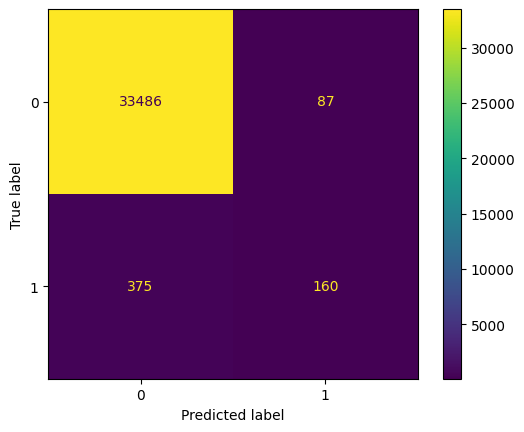

In [38]:
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [39]:
print(classification_report(ytest , y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     33573
           1       0.65      0.30      0.41       535

    accuracy                           0.99     34108
   macro avg       0.82      0.65      0.70     34108
weighted avg       0.98      0.99      0.98     34108




## ROC curve-Receiver Operator Characterstics

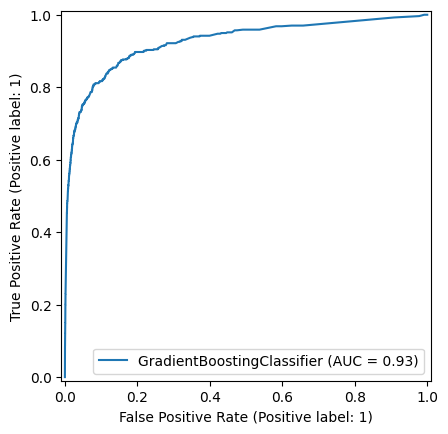

In [40]:
RocCurveDisplay.from_estimator(best_gbc,xtest,ytest)

# Final predtictions on testing set

In [41]:
url2 = r"https://raw.githubusercontent.com/Sid-2862/datasets/refs/heads/main/test%20classification.csv"

xnew = pd.read_csv(url2)
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [42]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]'])])

In [43]:
xnew_pre = pre.fit_transform(xnew)
xnew_pre.head()

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air temperature [K],con__Process temperature [K],con__Rotational speed [rpm],con__Torque [Nm],con__Tool wear [min]
0,0.0,1.0,0.0,1.313830,1.126570,-0.153806,-0.274579,-0.693494
1,0.0,1.0,0.0,0.990824,0.765635,1.375097,-1.356341,-1.366729
2,0.0,1.0,0.0,0.775487,0.332512,0.031949,-0.309854,-0.129855
3,0.0,0.0,1.0,0.129475,-0.244985,-0.296694,0.854217,-1.554608
4,0.0,0.0,1.0,1.906008,1.704068,-0.039496,0.113445,0.151964


In [52]:
final_preds = best_gbc.predict(xnew_pre)
final_preds 


array([0, 0, 0, ..., 0, 0, 0], shape=(90954,))

In [54]:
xnew["Machine_failure_preds"] = final_preds
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine_failure_preds
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0


In [55]:
submission = xnew[["id"]]
submission.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [56]:
submission["Machine Faliure"] = final_preds
submission

,id,Machine Faliure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [57]:
submission.to_csv("Machine Faliure Prediction.csv",index=False)